In [2]:
!pip3 install tabulate
import numpy as np
import tabulate

You should consider upgrading via the 'c:\users\pavilion\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input = x   #input
        self.weights1 = np.random.rand(self.input.shape[1],4)   #we want to optimize w1 and w2
        self.weights2 = np.random.rand(4,1)
        self.y = y    #output
        self.a2 = np.zeros(y.shape)  #predicted output

In [27]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))
    
class NeuralNetwork:    
    def __intit__(self,x,y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4) 
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.a2 = np.zeros(self.y.shape)
        
    def feedforward(self):
        self.a1 = sigmoid(np.dot(self.input, self.weights1))  #layer-1 output
        self.a2 = sigmoid(np.dot(self.a1, self.weights2))     #layer-2 output

In [43]:
import numpy as np

def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4) 
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.a2 = np.zeros(self.y.shape)
        self.loss = []
        
#     def sigmoid(x):
#         return 1.0/(1 + np.exp(-x))

#     def sigmoid_derivative(x):
#         return x * (1.0 - x)
    
    def feedforward(self):
        self.a1 = sigmoid(np.dot(self.input, self.weights1))  #layer-1 output
        self.a2 = sigmoid(np.dot(self.a1, self.weights2))     #layer-2 output
    
    def backprop(self):
        #application of the chain rule to find the derivative of the loss function with respect to weights1 and weights2
        d_weights2 = np.dot(self.a1.T, (2*(self.y - self.a2) * sigmoid_derivative(self.a2)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 *(self.y - self.a2) * sigmoid_derivative(self.a2), self.weights2.T)))

        #update the weights with the derivative(loss) of the function
        self.weights1 += d_weights1
        self.weights2 += d_weights2    

# Dummy Dataset

In [44]:
X = np.array([[0,0,0],
             [0,1,1],
             [1,0,1],
             [1,1,1]])
y = np.array([[0], [1], [1], [0]])

In [47]:
nn = NeuralNetwork(X,y)
loss = []

for i in range(1500):
    nn.feedforward()
    loss.append(np.square(np.subtract(y,nn.a2)).mean())
    nn.backprop()

table = [[y[0], pred[0]] for y, pred in zip(y, nn.a2)]
tabulate.tabulate(table, tablefmt='html', headers=['Actual', 'Predicted'])

Actual,Predicted
0,0.0178165
1,0.981219
1,0.981256
0,0.0216933


Text(0.5,1,'Loss per iteration')

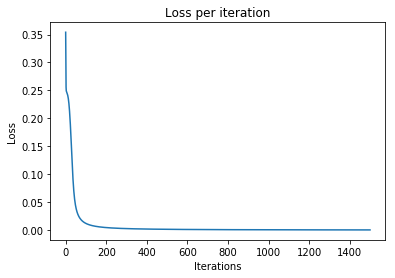

In [49]:
import matplotlib.pyplot as plt
x = range(0,len(loss))
plt.plot(x, loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per iteration')